In [1]:
import My_AutoML
from My_AutoML import load_data, AutoML
from My_AutoML._utils import train_test_split

### Insurance premium Prediction
https://www.kaggle.com/noordeen/insurance-premium-prediction

In [2]:
# load data
database = load_data(data_type = '.csv').load('example_data', ['insurance'])
database_names = [*database]

In [3]:
database['insurance'].head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
# define response/features
response = 'expenses'
features = list(database['insurance'].columns)
features.remove(response)

In [5]:
# train/test split
train_X, test_X, train_y, test_y = train_test_split(
    database['insurance'][features], database['insurance'][[response]]
)

In [6]:
# fit AutoML model
mol = AutoML(seed = 1)
mol.fit(train_X, train_y)

In [7]:
# predict using AutoML model
from sklearn.metrics import mean_squared_error
y_pred = mol.predict(test_X)
mean_squared_error(y_pred, test_y)

21309279.613129355

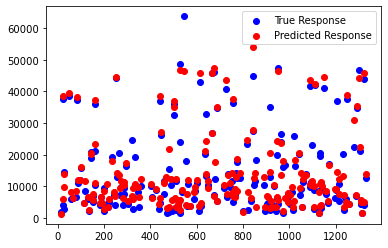

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(list(test_y.index), test_y.values, color = 'blue', label = 'True Response')
plt.scatter(list(test_y.index), y_pred, color = 'red', label = 'Predicted Response')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import r2_score
r2_score(y_pred, test_y)

0.8551737495890323